In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [2]:
import warnings

plt.style.use('seaborn-v0_8')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df_final = pd.read_csv("/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/Bybit_data_vol_OI.csv")
df_final.head()

,startTime,openPrice,highPrice,lowPrice,closePrice,symbol,volume,turnover,openInterest
0,2024-04-30,63846.04,64724.78,59089.54,60632.64,BTCUSD,2117478141,34765.045310,331760650.0
1,2024-04-29,63109.42,64191.68,61771.95,63846.04,BTCUSD,1330431186,21244.648750,317626466.0
2,2024-04-28,63433.42,64340.59,62767.71,63109.42,BTCUSD,698842508,10994.505878,316996638.0
3,2024-04-27,63751.61,63907.37,62397.63,63433.42,BTCUSD,912937699,14488.390121,318241311.0
4,2024-04-26,64488.03,64791.93,63308.59,63751.61,BTCUSD,1148931440,17931.562023,319516725.0


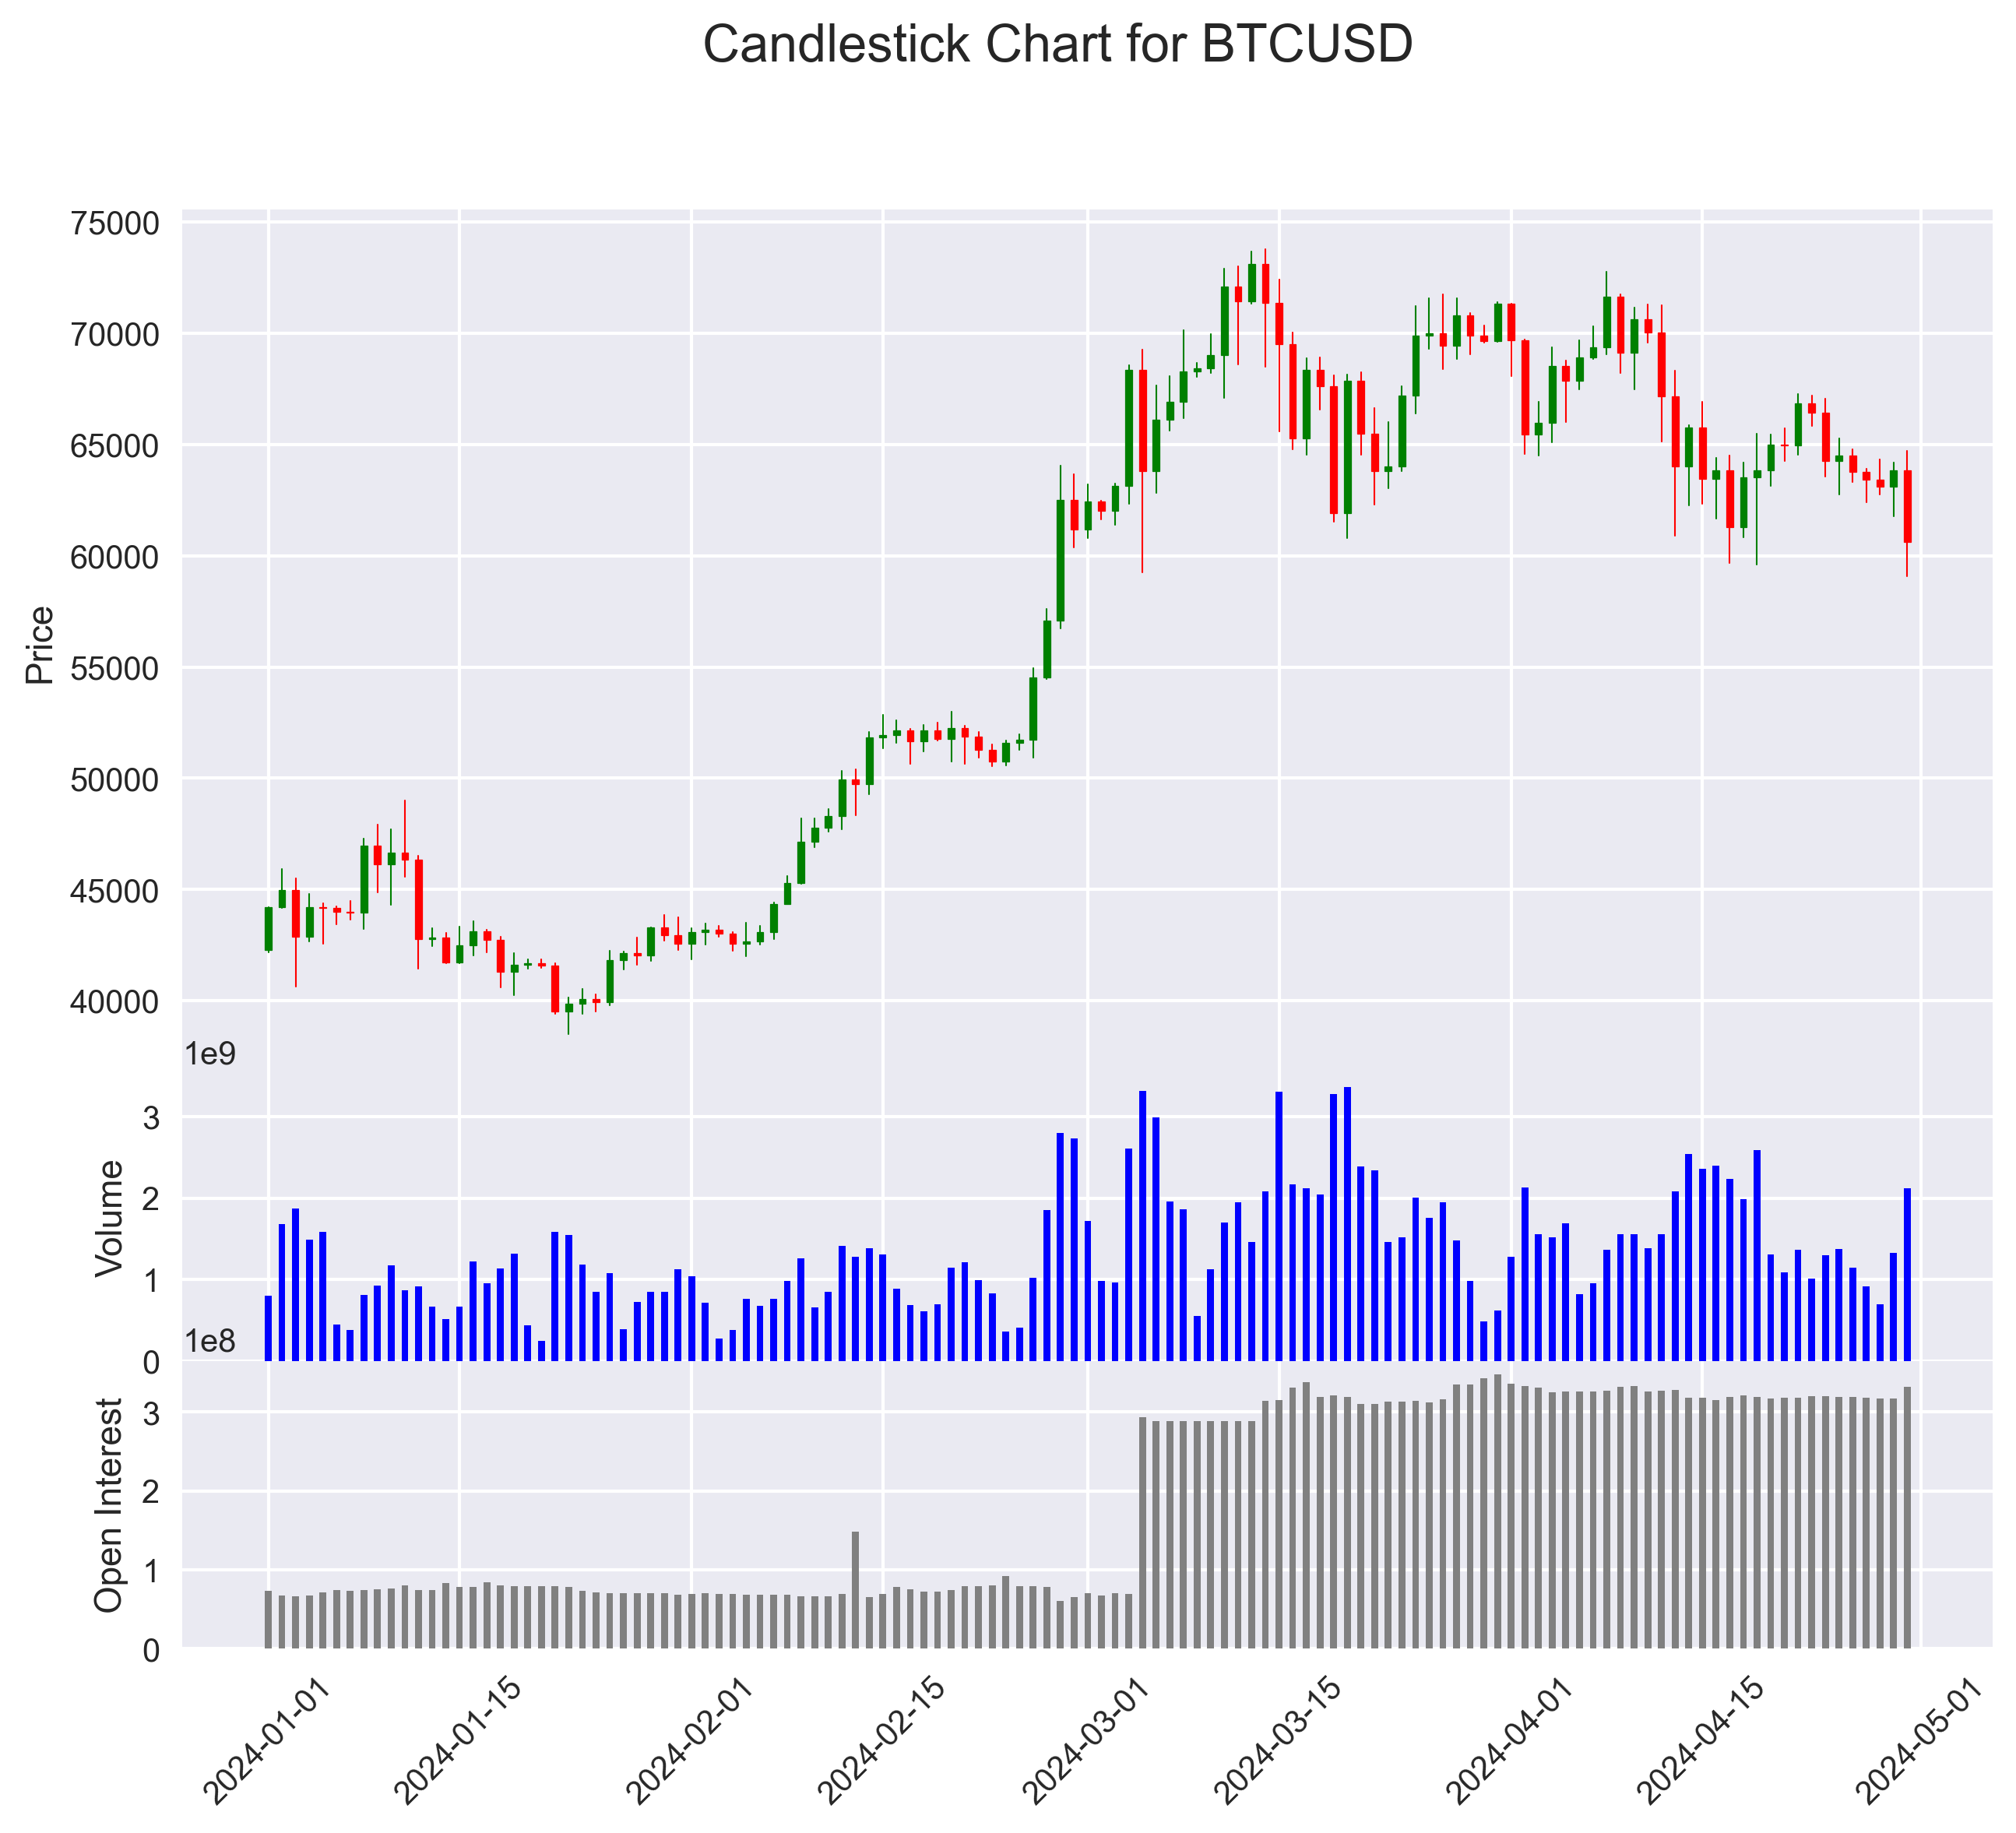

In [4]:


# Prepare data for candlestick chart
df_final['date'] = mdates.date2num(df_final['startTime'])




ohlc = df_final[['date', 'openPrice', 'highPrice', 'lowPrice', 'closePrice']].copy()
volume = df_final[['date', 'volume']].copy()
open_interest = df_final[['date', 'openInterest']].copy()

# Creating subplots with shared x-axis
fig, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1, 1]})

# Plot candlestick chart
candlestick_ohlc(ax, ohlc.values, width=0.5, colorup='green', colordown='red', alpha=1)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('Price')

# Plot volume below candlestick chart
ax2.bar(volume['date'], volume['volume'], color='blue', width=0.5)
ax2.set_ylabel('Volume')

# Plot open interest below volume chart
ax3.bar(open_interest['date'], open_interest['openInterest'], color='gray', width=0.5)
ax3.set_ylabel('Open Interest')

# Formatting the shared x-axis
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0)  # Reduce space between plots

# Set the title for the entire figure
fig.suptitle(f"Candlestick Chart for {df_final['symbol'][0]}", fontsize=16)


# Display the plot
plt.show()